# TQC 人工智慧 機器學習 證照 攻略(中)
## 第二類非監督學習 解題分享 (5/5)

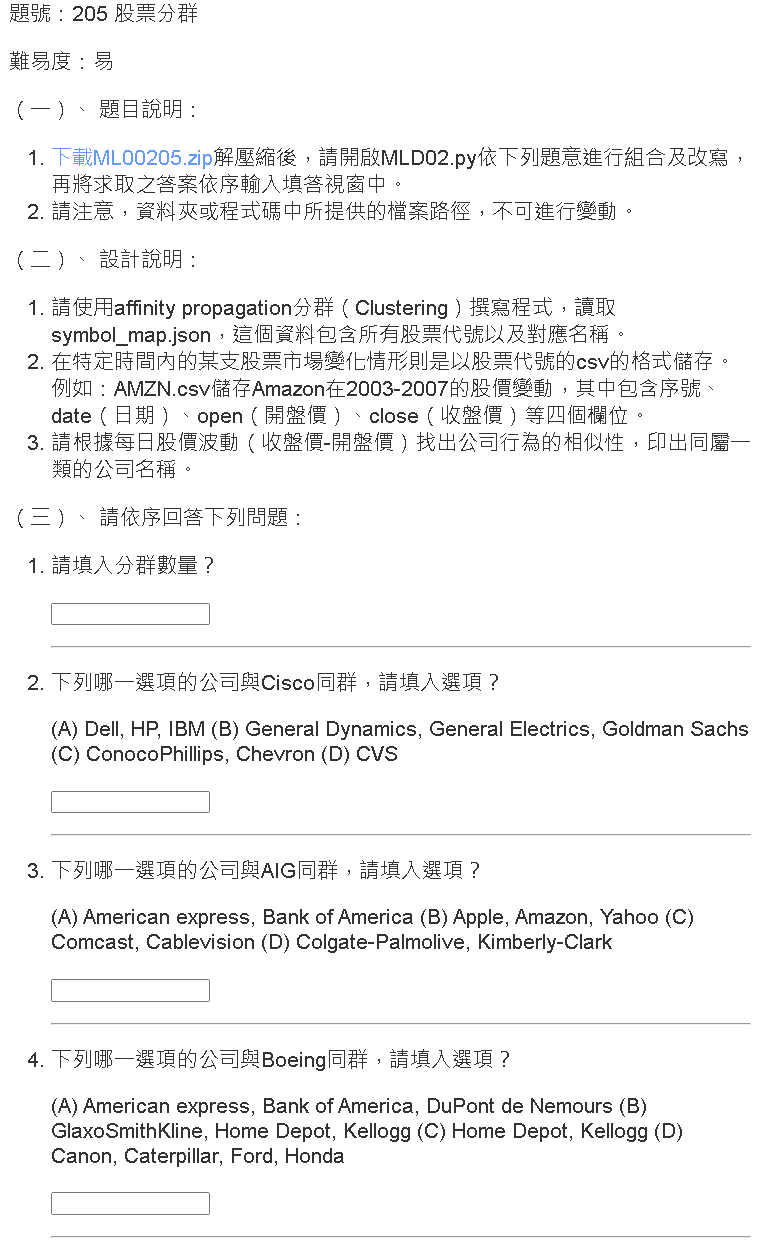

In [1]:
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

with open('symbol_map.json') as fp:
    json = json.load(fp)
symbols = pd.DataFrame(sorted(json.items()))[0]
names = pd.DataFrame(sorted(json.items()))[1]

stocks = []
for symbol in symbols:
    stocks.append(pd.read_csv(f"{symbol}.csv"))
# The daily fluctuations of the quotes 報價的每日波動
open_price = pd.DataFrame([stock['open'] for stock in stocks], index=symbols)
close_price = pd.DataFrame([stock['close'] for stock in stocks], index=symbols)
daily_var_price = open_price - close_price
# Build a graph model from the correlations 根據相關性建立圖模型
from sklearn.covariance import GraphicalLassoCV
model = GraphicalLassoCV()
# Standardize the data 標準化資料
X = pd.DataFrame(daily_var_price).T
X /= X.std()
# Train the model 訓練模型
model.fit(X)
# Build clustering model using affinity propagation 用相似性傳播構建分群模型
from sklearn.cluster import affinity_propagation
_, labels = affinity_propagation(model.covariance_, random_state=0)
num_labels = len(set(labels))
print(f'num_labels: {num_labels}')
# Print the results of clustering 列印分群結果
for i in range(len(set(labels))):
    print("Cluster", i+1, "-->" ,','.join(names[labels==i]))

num_labels: 8
Cluster 1 --> Apple,Amazon,Yahoo
Cluster 2 --> AIG,American express,Bank of America,DuPont de Nemours,General Dynamics,General Electrics,Goldman Sachs,GlaxoSmithKline,Home Depot,Kellogg
Cluster 3 --> Boeing,Canon,Caterpillar,Ford,Honda
Cluster 4 --> Cisco,Dell,HP,IBM
Cluster 5 --> Comcast,Cablevision
Cluster 6 --> CVS
Cluster 7 --> ConocoPhillips,Chevron
Cluster 8 --> Colgate-Palmolive,Kimberly-Clark
